Capstone Project - Location for the new restaurant


1. Description of the Problem and Discussion of the Background (Introduction Section)
Prospects of a opening an Chinese Restaurant in Toronto, Canada.

Toronto, capital of the province of Ontario, is a major Canadian city along Lake Ontario’s northwestern shore. It’s a dynamic metropolis with a core of soaring skyscrapers, all dwarfed by the iconic, free-standing CN Tower. Toronto also has many green spaces, from the orderly oval of Queen’s Park to 400-acre High Park and its trails, sports facilities and zoo.
In the 21st Century, Toronto has integrated the core and the suburbs under one government, although many bylaws enacted by the former municipalities remain in effect. A division has persisted between the interests of those who live in the former suburbs and those of the central core. The central core has seen unprecedented office growth and residential growth, particularly of condominium apartments, while the former suburbs and further outlying suburbs have seen the bulk of new industrial investment. A major metropolis of just over 2.8 million people, Toronto is also one of the most ethnically diverse in the world. All of this growth took place on the lands of the original Toronto Purchase, of which final agreement was only finally reached between the Mississauga and the Government of Canada in 2010.  With many office and residential growth in the city, there would be a huge demand of food, a good business chance to invest a restaurant in the city. The target audience would be the residents living in the area/working in the area and the tourists visiting Toronto

Who will be more interested in this project? What type of clients or a group of people would be benefitted?

    Business personnel who wants to invest or open an Chinese restaurant in Toronto. TThis analysis will give an idea, how beneficial it is to open a restaurant and what are the pros and cons of this business.
    Chinese tourists who are visiting toronto but still would like a taste of their homeland dishes
    Business Analyst or Data Scientists, who wish to analyze the neighborhoods of Toronto using Exploratory Data Analysis and other statistical & machine learning techniques to obtain all the necessary data, perform some operations on it and, finally be able to tell a story out of it.

2. Data acquisition and cleaning
Data Sources

a) “List of Postal code of Canada: M” (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) wikipedia page is used to get all the information about the neighborhoods present in Toronto. This page has the postal code, borough & the name of all the neighborhoods present in Toronto.

b) “https://cocl.us/Geospatial_data” csv file to get all the geographical coordinates of the neighborhoods for toronto

c)  “Demographics of Toronto” (https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity) wikipedia page to get the diversity culture in toronto . Using this page I’m going to identify the neighborhoods which are densely populated with Chinese as it might be helpful in identifying the suitable neighborhood to open a new Chinese restaurant.

d) To get location and other information about various venues in Toronto I’m using Foursquare’s explore API. Using the Foursquare’s explore API (which gives venues recommendations), I’m fetching details about the venues up present in Toronto and collected their names, categories and locations (latitude and longitude). From Foursquare API (https://developer.foursquare.com/docs), I retrieved the following for each venue:
Name: The name of the venue.
Category: The category type as defined by the API.
Latitude: The latitude value of the venue.
Longitude: The longitude value of the venue.


2.2 Data Cleaning

a) Scraped the following Wikipedia page, “List of Postal code of Canada: M” in order to obtain the data about the Toronto & the Neighborhoods in it.

b) Scraped the Demographics of Toronto wikipedia page to obtain the data about Toronto and ethicity/diversity culture

Dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
Only the cells that have an assigned borough will be processed. Borough that is not assigned are ignored.
More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.




In [109]:
#importing and installing the relevant libraries for the assignment

import pandas as pd
import numpy as np
import requests

!pip install lxml
!pip install html5lib

import lxml


In [110]:
#Read the file with the list of restaurants from wikipedia

#read the table from wikipedia 
df = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=890001695')[0]
df.head()
df.shape

#Remove the rows that have a Not assigned value in Borough
df = df[df['Borough'] !='Not assigned'].reset_index(drop=True, )


In [111]:
df = df[df['Borough'] !='Not assigned'].reset_index(drop=True, )


In [112]:
#remove duplicates
df[df.duplicated('Postcode')]
df =df.groupby(['Postcode','Borough'])
df=df['Neighbourhood'].apply(', '.join).reset_index() 


In [113]:
#based on the table, we can assume the first two letters of the post code represents the borough of the Canada
df.shape

(103, 3)

In [114]:

#Grab geospatial data for the neighborhood
!wget -O location.csv https://cocl.us/Geospatial_data

--2020-04-04 05:35:10--  https://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 169.48.113.194, 158.85.108.86, 158.85.108.83
Connecting to cocl.us (cocl.us)|169.48.113.194|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-04-04 05:35:11--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.26.197, 107.152.27.197
Connecting to ibm.box.com (ibm.box.com)|107.152.26.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-04-04 05:35:11--  https://ibm.box.com/public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/9afzr83pps4pwf2s

In [115]:
#create a dataframe for location data
location = pd.read_csv('location.csv')
location.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [116]:
#link the location dataframe to the toronto dataframe

toronto = pd.concat([df,location], join='inner', axis=1)
toronto = toronto.get(["Postcode", "Borough", "Neighbourhood", "Latitude" , "Longitude"])
toronto = toronto.rename(columns={'Neighbourhood':'Neighborhood'})
toronto.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [117]:

#grab the diversity tables from wikipedia for toronto ridings which contains their population and top 9 ethicity breakdown. tables have % as the column now 
#so we need to rename them for clearer understanding
#there are 4 tables 
diversity_1 = pd.read_html('https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity')[12]
diversity_1.head()
diversity_1.shape
diversity_1 = diversity_1.rename(columns={'%':'Percentage Ethic Origin 1', 
                                                      '%.1':'Percentage Ethic Origin 2',
                                                     '%.2':'Percentage Ethic Origin 3',
                                                     '%.3':'Percentage Ethic Origin 4',
                                                     '%.4':'Percentage Ethic Origin 5',
                                                     '%.5':'Percentage Ethic Origin 6',
                                                     '%.6':'Percentage Ethic Origin 7',
                                                     '%.7':'Percentage Ethic Origin 8',
                                                     '%.8':'Percentage Ethic Origin 9'})
diversity_1

#first table Toronto and East York

,Riding,Population,Ethnic Origin #1,Percentage Ethic Origin 1,Ethnic Origin #2,Percentage Ethic Origin 2,Ethnic Origin #3,Percentage Ethic Origin 3,Ethnic Origin #4,Percentage Ethic Origin 4,Ethnic Origin #5,Percentage Ethic Origin 5,Ethnic Origin #6,Percentage Ethic Origin 6,Ethnic Origin #7,Percentage Ethic Origin 7,Ethnic Origin #8,Percentage Ethic Origin 8,Ethnic Origin #9,Percentage Ethic Origin 9
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
#Second table North York
diversity_2 = pd.read_html('https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity')[13]
diversity_2.head()
diversity_2.shape
diversity_2 = diversity_2.rename(columns={'%':'Percentage Ethic Origin 1', 
                                                      '%.1':'Percentage Ethic Origin 2',
                                                     '%.2':'Percentage Ethic Origin 3',
                                                     '%.3':'Percentage Ethic Origin 4',
                                                     '%.4':'Percentage Ethic Origin 5',
                                                     '%.5':'Percentage Ethic Origin 6',
                                                     '%.6':'Percentage Ethic Origin 7',
                                                     '%.7':'Percentage Ethic Origin 8',
                                                     '%.8':'Percentage Ethic Origin 9'})
diversity_2

,Riding,Population,Ethnic Origin #1,Percentage Ethic Origin 1,Ethnic Origin #2,Percentage Ethic Origin 2,Ethnic Origin #3,Percentage Ethic Origin 3,Ethnic Origin #4,Percentage Ethic Origin 4,Ethnic Origin #5,Percentage Ethic Origin 5,Ethnic Origin #6,Percentage Ethic Origin 6,Ethnic Origin #7,Percentage Ethic Origin 7,Ethnic Origin #8,Percentage Ethic Origin 8
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


In [119]:
#Third table Scarborough
diversity_3 = pd.read_html('https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity')[14]
diversity_3.head()
diversity_3.shape
diversity_3 = diversity_3.rename(columns={'%':'Percentage Ethic Origin 1', 
                                                      '%.1':'Percentage Ethic Origin 2',
                                                     '%.2':'Percentage Ethic Origin 3',
                                                     '%.3':'Percentage Ethic Origin 4',
                                                     '%.4':'Percentage Ethic Origin 5',
                                                     '%.5':'Percentage Ethic Origin 6',
                                                     '%.6':'Percentage Ethic Origin 7',
                                                     '%.7':'Percentage Ethic Origin 8',
                                                     '%.8':'Percentage Ethic Origin 9'})
diversity_3

,Riding,Population,Ethnic Origin #1,Percentage Ethic Origin 1,Ethnic Origin #2,Percentage Ethic Origin 2,Ethnic Origin #3,Percentage Ethic Origin 3,Ethnic Origin #4,Percentage Ethic Origin 4,Ethnic Origin #5,Percentage Ethic Origin 5,Ethnic Origin #6,Percentage Ethic Origin 6,Ethnic Origin #7,Percentage Ethic Origin 7,Ethnic Origin #8,Percentage Ethic Origin 8
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
#Etobicoke and York
diversity_4 = pd.read_html('https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity')[15]
diversity_4.head()
diversity_4.shape
diversity_4 = diversity_4.rename(columns={'%':'Percentage Ethic Origin 1', 
                                                      '%.1':'Percentage Ethic Origin 2',
                                                     '%.2':'Percentage Ethic Origin 3',
                                                     '%.3':'Percentage Ethic Origin 4',
                                                     '%.4':'Percentage Ethic Origin 5',
                                                     '%.5':'Percentage Ethic Origin 6',
                                                     '%.6':'Percentage Ethic Origin 7',
                                                     '%.7':'Percentage Ethic Origin 8',
                                                     '%.8':'Percentage Ethic Origin 9'})
diversity_4

,Riding,Population,Ethnic Origin #1,Percentage Ethic Origin 1,Ethnic Origin #2,Percentage Ethic Origin 2,Ethnic Origin #3,Percentage Ethic Origin 3,Ethnic Origin #4,Percentage Ethic Origin 4,Ethnic Origin #5,Percentage Ethic Origin 5,Ethnic Origin #6,Percentage Ethic Origin 6,Ethnic Origin #7,Percentage Ethic Origin 7,Ethnic Origin #8,Percentage Ethic Origin 8
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# importing new libraries
!pip install geopy

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import json
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize
print('Libraries imported.')

Libraries imported.


In [122]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [123]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto['Latitude'], toronto['Longitude'], toronto['Borough'], toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto


In [124]:
CLIENT_ID = 'LDRPT2VNNHCZARM5EPBHGT0CJKK3FCKSR5XO20KNRKSBYGCX' # my Foursquare ID
CLIENT_SECRET = 'HPL103JML0YZK2TVKOJ0KOTOTLLF5Z453F3412UIYYKPN4T5' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
radius = 1000
#print(search_query + ' .... OK!')

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius)
results = requests.get(url).json()

Your credentails:
CLIENT_ID: LDRPT2VNNHCZARM5EPBHGT0CJKK3FCKSR5XO20KNRKSBYGCX
CLIENT_SECRET:HPL103JML0YZK2TVKOJ0KOTOTLLF5Z453F3412UIYYKPN4T5


In [125]:

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [126]:
import json
from pandas.io.json import json_normalize
#Now we are ready to clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON
#filter each column
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Japango,Sushi Restaurant,43.655268,-79.385165
3,LUSH,Cosmetics Shop,43.653557,-79.380400
4,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980


In [127]:
#Create function to know how many venues there are in Toronto
#this function repeats the same process as before but for all neighborhoods in toronto
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [128]:
#List of Neighborhood that have venues in Toronto
toronto_venues = getNearbyVenues(names=toronto['Neighborhood'],latitudes=toronto['Latitude'], longitudes=toronto['Longitude'] )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [129]:
print('{} venues were returned by Foursquare.'.format(toronto_venues.shape[0]))
toronto_venues.head()

2202 venues were returned by Foursquare.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Scarborough Historical Society,43.788755,-79.162438,History Museum
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant


In [130]:
#Number of venues per neighborhood
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,4,4,4,4,4,4
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",3,3,3,3,3,3
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",8,8,8,8,8,8
"Alderwood, Long Branch",10,10,10,10,10,10
"Bathurst Manor, Downsview North, Wilson Heights",19,19,19,19,19,19
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
Berczy Park,55,55,55,55,55,55


In [131]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 268 uniques categories.


In [132]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
manhattan_onehot = toronto_onehot[fixed_columns]

#toronto_onehot.head()
#filter for any columns with restaurant in its name column
toronto_onehot_restaurants = toronto_onehot.filter(regex='Restaurant|Neighborhood')
toronto_onehot_restaurants.head()

,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,Neighborhood,New American Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [133]:
#toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
#toronto_grouped.head()
#reformat them to display the average of a certain restaurant type in each neighborhood and sort neighborhood by descending
toronto_grouped = toronto_onehot_restaurants.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Adelaide, King, Richmond",0.0,0.02,0.02,0.0,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01,0.01,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.01,0.06,0.01,0.02,0.0,0.0,0.03,0.0,0.0,0.02,0.0
1,Agincourt,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.25,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0
4,"Alderwood, Long Branch",0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0


In [134]:
#since we are only interested in looking for chinese restaurants, filter for chinese restaurants only
toronto_chinese = toronto_grouped[['Neighborhood', 'Chinese Restaurant']]
toronto_chinese

,Neighborhood,Chinese Restaurant
0,"Adelaide, King, Richmond",0.000000
1,Agincourt,0.000000
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.000000
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.000000
4,"Alderwood, Long Branch",0.000000
5,"Bathurst Manor, Downsview North, Wilson Heights",0.000000
6,Bayview Village,0.250000
7,"Bedford Park, Lawrence Manor East",0.000000
8,Berczy Park,0.000000
9,"Birch Cliff, Cliffside West",0.000000


In [135]:

#merge them to the toronto data to see which borough/postcode they are in
merged_toronto_restaurants = pd.merge(toronto, toronto_chinese, on='Neighborhood')
merged_toronto_restaurants.sort_values(by=['Neighborhood'], inplace=True)
merged_toronto_restaurants

,Postcode,Borough,Neighborhood,Latitude,Longitude,Chinese Restaurant
55,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,0.000000
12,M1S,Scarborough,Agincourt,43.794200,-79.262029,0.000000
14,M1V,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St...",43.815252,-79.284577,0.000000
97,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437,0.000000
86,M8W,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,0.000000
25,M3H,North York,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,0.000000
18,M2K,North York,Bayview Village,43.786947,-79.385975,0.250000
59,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,0.000000
53,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0.000000
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0.000000


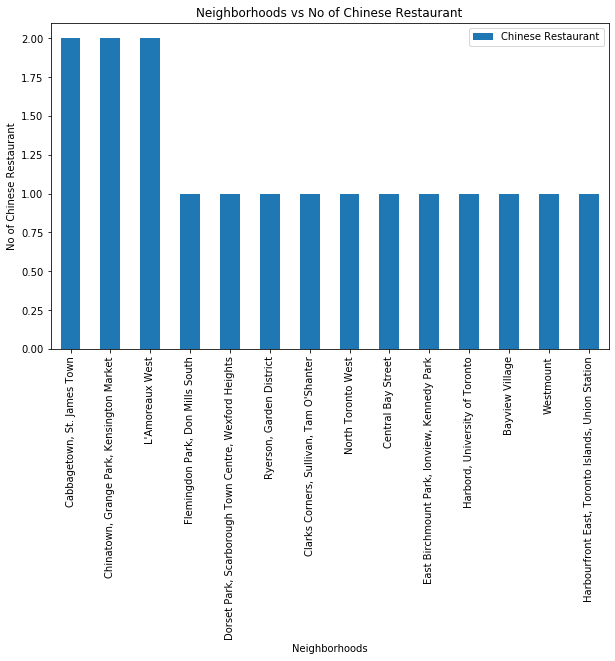

In [136]:
#Lets look at the number of chinese restaurants by boroughs and by neighborhoods
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

graph = pd.DataFrame(toronto_onehot.groupby('Neighborhood')['Chinese Restaurant'].sum())
graph = graph.sort_values(by ='Chinese Restaurant', ascending=False)
graph.iloc[:14].plot(kind='bar', figsize=(10,6))
plt.xlabel("Neighborhoods")
plt.ylabel("No of Chinese Restaurant")
plt.title("Neighborhoods vs No of Chinese Restaurant")
plt.show()

In [137]:
#Joining Dataframes together for the diversity dataframes

frames=[diversity_1, diversity_2, diversity_3, diversity_4]
joined_diversity_frames = pd.concat(frames)
joined_diversity_frames



,Riding,Population,Ethnic Origin #1,Percentage Ethic Origin 1,Ethnic Origin #2,Percentage Ethic Origin 2,Ethnic Origin #3,Percentage Ethic Origin 3,Ethnic Origin #4,Percentage Ethic Origin 4,Ethnic Origin #5,Percentage Ethic Origin 5,Ethnic Origin #6,Percentage Ethic Origin 6,Ethnic Origin #7,Percentage Ethic Origin 7,Ethnic Origin #8,Percentage Ethic Origin 8,Ethnic Origin #9,Percentage Ethic Origin 9
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.50,Irish,9.2,Russian,8.4,NaN,NaN


In [138]:
#filter out the rows that have a chinese ethic origin percentage and remove the rest that dont have it
chinese_diversity = joined_diversity_frames.loc[(joined_diversity_frames['Ethnic Origin #1'] == 'Chinese')| 
                                      (joined_diversity_frames['Ethnic Origin #2'] == 'Chinese')|
                                      (joined_diversity_frames['Ethnic Origin #3'] == 'Chinese')|
                                      (joined_diversity_frames['Ethnic Origin #4'] == 'Chinese')|
                                      (joined_diversity_frames['Ethnic Origin #5'] == 'Chinese')|
                                      (joined_diversity_frames['Ethnic Origin #6'] == 'Chinese')|
                                      (joined_diversity_frames['Ethnic Origin #7'] == 'Chinese')|
                                      (joined_diversity_frames['Ethnic Origin #8'] == 'Chinese')|
                                      (joined_diversity_frames['Ethnic Origin #9'] == 'Chinese')]
chinese_population_diversity = pd.DataFrame(chinese_diversity).reset_index()
chinese_population_diversity.drop('index',axis=1,inplace=True)

chinese_population_diversity


,Riding,Population,Ethnic Origin #1,Percentage Ethic Origin 1,Ethnic Origin #2,Percentage Ethic Origin 2,Ethnic Origin #3,Percentage Ethic Origin 3,Ethnic Origin #4,Percentage Ethic Origin 4,Ethnic Origin #5,Percentage Ethic Origin 5,Ethnic Origin #6,Percentage Ethic Origin 6,Ethnic Origin #7,Percentage Ethic Origin 7,Ethnic Origin #8,Percentage Ethic Origin 8,Ethnic Origin #9,Percentage Ethic Origin 9
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
2,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
3,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN
4,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.00,Filipino,7.8,NaN,NaN,NaN,NaN
8,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.00,NaN,NaN,NaN,NaN,NaN,NaN
9,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.20,Chinese,7.2,NaN,NaN,NaN,NaN


In [139]:
#we only want the ethicity to be chinese and the percentages - remove all other columns
#created an array to go through each column for each row
columns_list = chinese_population_diversity.columns.to_list()
chinese_population_diversity_2 = pd.DataFrame()
#removing Riding & Population from the column names list
del columns_list[0]
del columns_list[0]


for i in range(0,chinese_population_diversity.shape[0]):
    for j in columns_list:
        print(j)
        if chinese_population_diversity.at[i, j] == 'Chinese':
            k = columns_list.index(j) + 1
            percent_col = columns_list[k]
            chinese_population_diversity_2 = chinese_population_diversity_2 .append({'Riding':chinese_population_diversity.at[i, 'Riding'], 'Population':chinese_population_diversity.at[i, 'Population']
                                                                           , 'Ethnicity': chinese_population_diversity.at[i, j], 'Percentage': chinese_population_diversity.at[i, percent_col]},ignore_index=True)

chinese_population_diversity_2

Ethnic Origin #1
Percentage Ethic Origin 1
Ethnic Origin #2
Percentage Ethic Origin 2
Ethnic Origin #3
Percentage Ethic Origin 3
Ethnic Origin #4
Percentage Ethic Origin 4
Ethnic Origin #5
Percentage Ethic Origin 5
Ethnic Origin #6
Percentage Ethic Origin 6
Ethnic Origin #7
Percentage Ethic Origin 7
Ethnic Origin #8
Percentage Ethic Origin 8
Ethnic Origin #9
Percentage Ethic Origin 9
Ethnic Origin #1
Percentage Ethic Origin 1
Ethnic Origin #2
Percentage Ethic Origin 2
Ethnic Origin #3
Percentage Ethic Origin 3
Ethnic Origin #4
Percentage Ethic Origin 4
Ethnic Origin #5
Percentage Ethic Origin 5
Ethnic Origin #6
Percentage Ethic Origin 6
Ethnic Origin #7
Percentage Ethic Origin 7
Ethnic Origin #8
Percentage Ethic Origin 8
Ethnic Origin #9
Percentage Ethic Origin 9
Ethnic Origin #1
Percentage Ethic Origin 1
Ethnic Origin #2
Percentage Ethic Origin 2
Ethnic Origin #3
Percentage Ethic Origin 3
Ethnic Origin #4
Percentage Ethic Origin 4
Ethnic Origin #5
Percentage Ethic Origin 5
Ethnic Orig

,Ethnicity,Percentage,Population,Riding
0,Chinese,16.0,114315.0,Spadina-Fort York
1,Chinese,13.8,105395.0,Toronto-Danforth
2,Chinese,14.7,100520.0,University-Rosedale
3,Chinese,12.5,99590.0,Toronto Centre
4,Chinese,25.9,117405.0,Willowdale
5,Chinese,32.4,109060.0,Don Valley North
6,Chinese,11.2,101790.0,Don Valley West
7,Chinese,8.9,93170.0,Don Valley East
8,Chinese,10.7,110450.0,Scarborough Centre
9,Chinese,7.2,108295.0,Scarborough Southwest


In [140]:
#calculate the chinese population in each riding from the population and the ethicity percentage
chinese_population_diversity_2['Chinese Population'] = (chinese_population_diversity_2['Percentage'] * chinese_population_diversity_2['Population'])/100
chinese_population_diversity_2.drop(columns={'Percentage','Population','Ethnicity'},axis=1, inplace =True)
chinese_population_diversity_2.drop_duplicates(keep='first',inplace=True) 
chinese_population_diversity_2

,Riding,Chinese Population
0,Spadina-Fort York,18290.400
1,Toronto-Danforth,14544.510
2,University-Rosedale,14776.440
3,Toronto Centre,12448.750
4,Willowdale,30407.895
5,Don Valley North,35335.440
6,Don Valley West,11400.480
7,Don Valley East,8292.130
8,Scarborough Centre,11818.150
9,Scarborough Southwest,7797.240


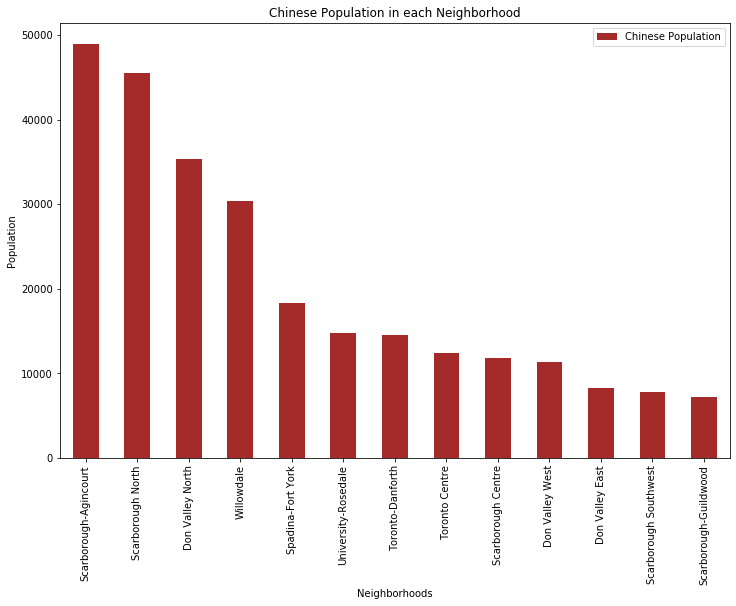

In [141]:

#display it as a column graph
bar_graph = chinese_population_diversity_2.sort_values(by='Chinese Population', ascending=False)
bar_graph.plot(kind='bar',x='Riding', y='Chinese Population',figsize=(12,8), color='brown')
plt.title("Chinese Population in each Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Population")
plt.show()



In [142]:
#display the riding list in toronto that has a chinese population in the top 9 ethicity. 
riding_list = chinese_population_diversity_2['Riding'].to_list()
riding_list

['Spadina-Fort York',
 'Toronto-Danforth',
 'University-Rosedale',
 'Toronto Centre',
 'Willowdale',
 'Don Valley North',
 'Don Valley West',
 'Don Valley East',
 'Scarborough Centre',
 'Scarborough Southwest',
 'Scarborough-Agincourt',
 'Scarborough-Guildwood',
 'Scarborough North']

In [143]:
#create a dataframe that contains the ridings as well as the neighborhoods. the neighborhoods were found from the wikipedia pages of each riding. 
chinese_population_diversity_2.loc[chinese_population_diversity_2['Riding'] == 'Don Valley East','Neighborhoods'] = 'Flemingdon Park, Don Mills South, Graydon Hall, Parkwoods, Victoria Village'
chinese_population_diversity_2.loc[chinese_population_diversity_2['Riding'] == 'Don Valley North','Neighborhoods'] = ' Henry Farm, Bayview Village, Bayview Woods-Steeles, Hillcrest Village, Don Valley Village, Pleasant View'
chinese_population_diversity_2.loc[chinese_population_diversity_2['Riding'] == 'Don Valley West','Neighborhoods'] = 'Silver Hills, York Mills, York Mills West, Lawrence Park, Leaside, Thorncliffe Park'
chinese_population_diversity_2.loc[chinese_population_diversity_2['Riding'] == 'Willowdale','Neighborhoods'] = 'Willowdale, Lansing, Newtonbrook, North York Centre'
chinese_population_diversity_2.loc[chinese_population_diversity_2['Riding'] == 'Scarborough Centre','Neighborhoods'] = 'Scarborough City Centre, Bendale, Eglinton East, Ionview, Golden Mile, Wexford, Maryvale, Dorset Park'
chinese_population_diversity_2.loc[chinese_population_diversity_2['Riding'] == 'University-Rosedale','Neighborhoods'] = 'University of Toronto, Rosedale, Little Italy, the Annex, Yorkville, Downtown Toronto'
chinese_population_diversity_2.loc[chinese_population_diversity_2['Riding'] == 'Scarborough Southwest','Neighborhoods'] = ' Birch Clifff, Oakridge, Cliffside, Kennedy Park, Clairlea, Cliffcrest, Scarborough Village West, Golden Mile'
chinese_population_diversity_2.loc[chinese_population_diversity_2['Riding'] == 'Scarborough-Agincourt','Neighborhoods'] = "Steeles, L'Amoreaux, Tam O'Shanter-Sullivan, Agincourt (west of Midland Avenue) and Milliken (west of Midland Avenue)"
chinese_population_diversity_2.loc[chinese_population_diversity_2['Riding'] == 'Scarborough-Guildwood','Neighborhoods'] = 'Guildwood, West Hill (west of Morningside Avenue), Morningside, Woburn, Scarborough Village (east of Markham Road)'
chinese_population_diversity_2.loc[chinese_population_diversity_2['Riding'] == 'Scarborough North','Neighborhoods'] = 'Agincourt (east of Midland Avenue), Milliken (east of Midland Avenue), Morningside Heights (Brookside), and Malvern (west of Neilson Road)'
chinese_population_diversity_2.loc[chinese_population_diversity_2['Riding'] == 'Toronto-Danforth','Neighborhoods'] = 'East York, The Danforth West, Riverdale, Leslieville, Riverside'
chinese_population_diversity_2.loc[chinese_population_diversity_2['Riding'] == 'Spadina-Fort York','Neighborhoods'] = 'Agincourt (east of Midland Avenue), Milliken (east of Midland Avenue), Morningside Heights (Brookside), and Malvern (west of Neilson Road)'
chinese_population_diversity_2.loc[chinese_population_diversity_2['Riding'] == 'Toronto Centre','Neighborhoods'] = 'Regent Park, St. James Town, Cabbagetown, Church and Wellesley, Ryerson University, Toronto Eaton Centre'

chinese_population_diversity_2


,Riding,Chinese Population,Neighborhoods
0,Spadina-Fort York,18290.400,"Agincourt (east of Midland Avenue), Milliken (..."
1,Toronto-Danforth,14544.510,"East York, The Danforth West, Riverdale, Lesli..."
2,University-Rosedale,14776.440,"University of Toronto, Rosedale, Little Italy,..."
3,Toronto Centre,12448.750,"Regent Park, St. James Town, Cabbagetown, Chur..."
4,Willowdale,30407.895,"Willowdale, Lansing, Newtonbrook, North York C..."
5,Don Valley North,35335.440,"Henry Farm, Bayview Village, Bayview Woods-St..."
6,Don Valley West,11400.480,"Silver Hills, York Mills, York Mills West, Law..."
7,Don Valley East,8292.130,"Flemingdon Park, Don Mills South, Graydon Hall..."
8,Scarborough Centre,11818.150,"Scarborough City Centre, Bendale, Eglinton Eas..."
9,Scarborough Southwest,7797.240,"Birch Clifff, Oakridge, Cliffside, Kennedy Pa..."


In [144]:

#split each of the neighborhoods into the Riding's chinese population.
#then merge the dataframe to the chinese restaurant neighborhood dataframe

chinese_population_diversity_2['split_neighborhoods'] = chinese_population_diversity_2['Neighborhoods'].str.split(',') 
chinese_population_diversity_2.drop(columns=['Neighborhoods'],inplace=True,axis=1)
chinese_population_diversity_2 = chinese_population_diversity_2.split_neighborhoods.apply(pd.Series).merge(chinese_population_diversity_2, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['Chinese Population'], value_name = "Neighborhood").drop("variable", axis = 1).dropna()

chinese_population_diversity_2.reset_index()
chinese_population_diversity_2

,Chinese Population,Neighborhood
0,18290.400,Agincourt (east of Midland Avenue)
1,14544.510,East York
2,14776.440,University of Toronto
3,12448.750,Regent Park
4,30407.895,Willowdale
5,35335.440,Henry Farm
6,11400.480,Silver Hills
7,8292.130,Flemingdon Park
8,11818.150,Scarborough City Centre
9,7797.240,Birch Clifff


In [145]:
toronto_chinese['split_neighborhoods'] = toronto_chinese['Neighborhood'].str.split(',') 
toronto_chinese.drop(columns=['Neighborhood'],inplace=True,axis=1)
toronto_chinese = toronto_chinese.split_neighborhoods.apply(pd.Series).merge(toronto_chinese, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['Chinese Restaurant'], value_name = "Neighborhood").drop("variable", axis = 1).dropna()

toronto_chinese.reset_index()
toronto_chinese

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Chinese Restaurant,Neighborhood
0,0.000000,Adelaide
1,0.000000,Agincourt
2,0.000000,Agincourt North
3,0.000000,Albion Gardens
4,0.000000,Alderwood
5,0.000000,Bathurst Manor
6,0.250000,Bayview Village
7,0.000000,Bedford Park
8,0.000000,Berczy Park
9,0.000000,Birch Cliff


In [146]:
pop_merged_restaurant_percent = pd.merge(chinese_population_diversity_2, toronto_chinese, on='Neighborhood')
pop_merged_restaurant_percent

,Chinese Population,Neighborhood,Chinese Restaurant
0,35335.440,Henry Farm,0.000000
1,8292.130,Flemingdon Park,0.050000
2,7179.165,Guildwood,0.000000
3,12448.750,St. James Town,0.042553
4,8292.130,Don Mills South,0.050000
5,7797.240,Oakridge,0.000000
6,14544.510,Riverdale,0.000000
7,7797.240,Cliffside,0.000000
8,7179.165,Morningside,0.000000
9,11818.150,Ionview,0.166667



There does not seems to be a big relationship between the chinese population and the populat chinese restaurants. After data cleaning and analysis, time to look at the predictive modelling, which we are going to use clustering technique. K-Means clustering is used to perform the analysis of the data at hand.


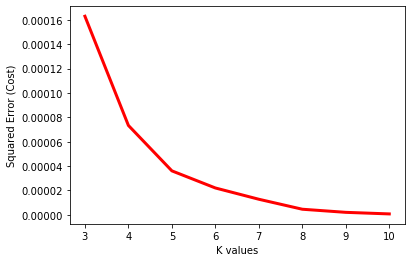

In [147]:
#Clustering Predictive modelling


from sklearn.cluster import KMeans

chinese_neighborhood_clustering = toronto_chinese.drop('Neighborhood', 1)


error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(chinese_neighborhood_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

In [148]:
kclusters = 4
chinese_neighborhood_clustering = toronto_chinese.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chinese_neighborhood_clustering)
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [149]:
#sorted_neighborhoods_venues.drop(['Cluster Labels'],axis=1,inplace=True)
toronto_chinese.insert(0, 'Cluster Labels', kmeans.labels_)
merged_toronto_restaurants = toronto
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
merged_toronto_restaurants = merged_toronto_restaurants.join(toronto_chinese.set_index('Neighborhood'), on='Neighborhood')
merged_toronto_restaurants.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
merged_toronto_restaurants.reset_index(drop=True, inplace=True)
merged_toronto_restaurants['Cluster Labels'].astype(int)
merged_toronto_restaurants.head()
merged_toronto_restaurants

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Chinese Restaurant
0,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,0.000000
1,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,0.000000
2,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0.0,0.000000
3,M1S,Scarborough,Agincourt,43.794200,-79.262029,0.0,0.000000
4,M1W,Scarborough,L'Amoreaux West,43.799525,-79.318389,1.0,0.142857
5,M2H,North York,Hillcrest Village,43.803762,-79.363452,0.0,0.000000
6,M2K,North York,Bayview Village,43.786947,-79.385975,3.0,0.250000
7,M2N,North York,Willowdale South,43.770120,-79.408493,0.0,0.000000
8,M2P,North York,York Mills West,43.752758,-79.400049,0.0,0.000000
9,M2R,North York,Willowdale West,43.782736,-79.442259,0.0,0.000000


In [150]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged_toronto_restaurants['Latitude'], merged_toronto_restaurants['Longitude'], merged_toronto_restaurants['Neighborhood'], merged_toronto_restaurants['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [151]:
#Cluster 0
merged_toronto_restaurants.loc[merged_toronto_restaurants['Cluster Labels'] == 0]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Chinese Restaurant
0,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,0.000000
1,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,0.000000
2,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0.0,0.000000
3,M1S,Scarborough,Agincourt,43.794200,-79.262029,0.0,0.000000
5,M2H,North York,Hillcrest Village,43.803762,-79.363452,0.0,0.000000
7,M2N,North York,Willowdale South,43.770120,-79.408493,0.0,0.000000
8,M2P,North York,York Mills West,43.752758,-79.400049,0.0,0.000000
9,M2R,North York,Willowdale West,43.782736,-79.442259,0.0,0.000000
10,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,0.000000
11,M3B,North York,Don Mills North,43.745906,-79.352188,0.0,0.000000


In [152]:
#Cluster 1
merged_toronto_restaurants.loc[merged_toronto_restaurants['Cluster Labels'] == 1]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Chinese Restaurant
4,M1W,Scarborough,L'Amoreaux West,43.799525,-79.318389,1.0,0.142857
42,M9P,Etobicoke,Westmount,43.696319,-79.532242,1.0,0.125000


In [153]:
#Cluster 2
merged_toronto_restaurants.loc[merged_toronto_restaurants['Cluster Labels'] == 2]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Chinese Restaurant
24,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,2.0,0.058824


In [154]:
#Cluster 3
merged_toronto_restaurants.loc[merged_toronto_restaurants['Cluster Labels'] == 3]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Chinese Restaurant
6,M2K,North York,Bayview Village,43.786947,-79.385975,3.0,0.25


In [155]:
#Cluster 4
merged_toronto_restaurants.loc[merged_toronto_restaurants['Cluster Labels'] == 4]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Chinese Restaurant



5. Results and Discussion:
5.1 Results


We have reached the end of the analysis, in the result section we can document all the findinds from above clustering & visualization of the datas. In this project, as the business problem started with identifying a good neighborhood to open a new Chinese restaurant, we looked into all the neighborhoods in Toronto, analysed the Chinese population in each neighborhood & spread of Chinese restaurants in those neighborhoods to come to conclusion about which neighborhood would be a better spot for opening a new Chinese restaurant.

Using the data from web resources like Wikipedia, geospatial coordinates of Toronto neighborhoods, and Foursquare API, to set up a very realistic data-analysis scenario. We have found out that —
In all the ridings, Scarborough-Agincourt,Scarborough North, Don Valley North , Willowdale, Spadina-Fort York,Toronto-Danforth ,University-Rosedale, Toronto Centre , Don Valley West ,  Don Valley East,Scarborough Centre ,Scarborough Southwest,Scarborough-Guildwood  are the densely populated with Chinese crowd ridings.

With the help of clusters examing  looks like Don valley north, Toronto Centre, Scarborough centre and scarborough southwest  are already densely populated with Chinese restaurants. So it is better idea to leave those boroughs out and consider only Don valley north, Toronto Centre, Scarborough centre and scarborough southwest for the new restaurant's location.

After careful consideration it is a good idea to open a new Chinese restaurant in Scarborough borough since it has high number of Chinese population which gives a higher number of customers possibility and lower competition since very less Chinese restaurants in the neighborhoods.



5.2 Discussion

According to this analysis, Scarborough borough will provide least competition for the new upcoming Chinese restaurant as there is very little Chinese restaurants spread or no Chinese restaurants in neighborhoods. 

Also looking at the population distribution looks like it is densely populated with Chinese crowd which helps the new restaurant by providing hig customer visit possibilty. So, definitely this region could potentially be a perfect place for starting a quality Chinese restaurants. 

Some of the drawbacks of this analysis are — the clustering is completely based only on data obtained from Foursquare API. Also the Chinese population distribution in each neighborhood is also based on the 2016 census which is not up-to date. Thus population distribution would have definitely changed by 2020 given 4 years gap in the data. 

Since population distribution of Chinese crowd in each neighborhood & number of Chinese restaurants are the major feature in this analysis and it is not fully up-to date data, this analysis is definitely not far from being conclusory & it has lot of areas where it can be imporved. We also noticed that there were no indication or restaurants in the neighborhoods that contain the 'Chinatown' area, even though google maps shows that there are a bunch of restaurants there. this could be indicating that the restaurants there are labelled as 'asian' or some form of asian culture diversity and not specifically 'Chinese', which causes our data to be looking at a different area for opening up a business.


However, it certainly provides us with some good insights, preliminary information on possibilites & a head start into this business problem by setting the step stones properly. Furthermore, this may also potentially vary depending on the type of clustering techniques that we use to examine the data.



6. Conclusion:

Finally to conclude this project, We have got a chance to on a business problem like how a real like data scientists would do. Using python libraries to fetch, clean and format the data , to manipulate the contents & to analyze and visualize those datasets. We have made use of Foursquare API to explore the venues in enighborhoods of Toronto, imported data from Wikipedia  visualized using various plots present in seaborn & matplotlib for graphs. 

We also applied machine learning technique to to predict the output given the data and used Folium to visualize it on a map. Also, some of the drawbacks or areas of improvements shows us that this analysis can further be improved with help more data and different machine learning technique. Similarly we can use this project to analysis any scenario such opening a different cuisine or success of opening a new gym and etc. Hopefully, this project helps acts as initial guidance to take more complex real-life challenges using data-science.
